# Linear Regression

In [ ]:
# Import of packages
import numpy as np
from scipy import optimize

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

We're given the following linear equation: 

$$y_i = \beta_0 + \beta_1 x_{1,i}+\beta_2 x_{2,i}+\epsilon $$

Given the information in the exam questions we assume we have access to data of the independent variables $(x_{1,i},x_{2,i})$ and the dependent variabel $(y_i)$ for N individuals, where $i$ indexes individuals. 

The variable $\epsilon_i$, is a mean-zero stochastic shock. 

## Data Generating Process 

In [ ]:
def DGP(N):

    # a. independent variables
    x1 = np.random.normal(0,1,size=N)
    x2 = np.random.normal(0,1,size=N)

    # b. errors
    eps = np.random.normal(0,1,size=N)

    extreme = np.random.uniform(0,1,size=N)
    eps[extreme < 0.05] += np.random.normal(-5,1,size=N)[extreme < 0.05]
    eps[extreme > 0.95] += np.random.normal(5,1,size=N)[extreme > 0.95]

    # c. dependent variable
    y = 0.1 + 0.3*x1 + 0.5*x2 + eps
    return x1, x2, y

** Data accessible: **

In [ ]:
np.random.seed(2020)
x1,x2,y = DGP(10000)

# Question 1

In [ ]:
#Creating the matrix X
a = [1]*10000
X = np.matrix(np.vstack((a,x1,x2)))
print('stacked:\n',X)

In [ ]:
#Transposing and inversing the matrix X according to the beta_hat given
x = X.transpose()
X_mul=X @ x
X_mul_inv=np.linalg.inv(X_mul)
x_mul=X_mul_inv@X
y1=y[:,np.newaxis]

In [ ]:
# Estimating the vector of coefficients using OLS 
np.linalg.lstsq(x,y1)

# Question 2

In [ ]:
#Obtains the same results as obtained in Q1, but as individual functions of beta0, beta1 and beta2
beta=x_mul@y1
beta0_hat=float(beta[0])
beta1_hat=float(beta[1])
beta2_hat=float(beta[2])

In [ ]:
#Predicting the model given the values obtained above 
beta0_predict=[beta0_hat]*10000
x1_predict=beta1_hat*x1
x2_predict=beta2_hat*x2
y_predict = beta0_predict + x1_predict + x2_predict

In [ ]:
#Creating the 3D-plot

# a. main
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
cs = ax.scatter(x1_predict,x2_predict, y_predict);        

# b. add labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')

# c. invert xaxis
ax.invert_xaxis()

# d. colorbar
fig.colorbar(cs);

# Question 3

In [ ]:
#Initially we define the residuals
u=np.empty(len(x1))
def residuals(beta0,beta1,beta2):
    for i in range(len(x1)):
        u[i] = (y1[i] - beta0 - beta1*x1[i] - beta2*x2[i])
    return u

In [ ]:
#Estimating the vector of coefficients using Ordinary Least Squares using a numerical solver 

#Defining objective function
def OLS_objective_function(x,beta0,beta1,beta2):
    beta0=x[0]
    beta1=x[1]
    beta2=x[2]
    OLS_sum_squared_errors = np.sum(residuals(beta0,beta1,beta2)**2)
    return OLS_sum_squared_errors

    #Initial guess of betas
    beta_guess= np.array([1,1,1]) 

    res = optimize.minimize(OLS_objective_function,beta_guess,method='Nelder-Mead',args=(beta0,beta1,beta2))

print(res.x[0])
print(res.x[1])
print(res.x[2])

# Question 4

In [ ]:
#Estimating the vector of coefficients using Least Absolute Deviations (LAD) using a numerical solver 

#Defining a new objective function
def LAD_objective_function(x, beta0,beta1,beta2):
    beta0=x[0]
    beta1=x[1]
    beta2=x[2]
    LAD_sum_squared_errors = np.sum(np.aps(residuals(beta0,beta1,beta2)))
    return LAD_sum_squared_errors    

    res = optimize.minimize(LAD_objective_function,beta_guess,method='Nelder-Mead',args=(beta0,beta1,beta2))

print(res.x[0])
print(res.x[1])
print(res.x[2])

# Question 5

### OLS Method

In [39]:
# OLS
beta0_OLS = np.empty(5000)
beta1_OLS = np.empty(5000)
beta2_OLS = np.empty(5000)

for i in range(5000):
    x1_new,x2_new,y_new = DGP(50)
    u_new=np.empty(len(x1_new))

    def residuals_new(beta0_OLS,beta1_OLS,beta2_OLS):
        for i in range(len(x1_new)):
            u_new[i] = (y_new[i] - beta0_OLS - beta1_OLS*x1_new[i] - beta2_OLS*x2_new[i])
        return u_new

    def obj_new(x,b0,b1,b2):
        beta0_OLS=x[0]
        beta1_OLS=x[1]
        beta2_OLS=x[2]
        sse_new = np.sum(residuals_new(beta0_OLS,beta1_OLS,beta2_OLS)**2)
        return sse_new

    #Initial guess of betas
    beta_guess= np.array([1,1,1]) 

    res = optimize.minimize(obj_new,beta_guess,method='SLSQP',args=(beta0_OLS,beta1_OLS,beta2_OLS))

    beta0_OLS[i-1]=res.x[0]
    beta1_OLS[i-1]=res.x[1]
    beta2_OLS[i-1]=res.x[2]

#Printing the results
print(res.x[0])
print(res.x[1])
print(res.x[2])

-0.04919521344428973
0.24043949144342205
0.6247498832857727


In [44]:
#LAD

beta0_LAD = np.empty(5000)
beta1_LAD = np.empty(5000)
beta2_LAD = np.empty(5000)

for i in range(5000):
    x1_new,x2_new,y_new = DGP(50)
    #defining the residuals
    u_new=np.empty(len(x1_new))

    def residuals_new(beta0_LAD,beta1_LAD,beta2_LAD):
        for i in range(len(x1_new)):
            u_new[i] = (y_new[i] - beta0_LAD - beta1_LAD*x1_new[i] - beta2_LAD*x2_new[i])
        return u_new
    
    def obj_new(x,beta0_LAD,beta1_LAD,beta2_LAD):
        beta0_LAD=x[0]
        beta1_LAD=x[1]
        beta2_LAD=x[2]
        sse1_new = np.sum(np.abs(residuals_new(beta0_LAD,beta1_LAD,beta2_LAD)))
        return sse1_new

    res = optimize.minimize(obj_new,beta_guess,method='SLSQP',args=(beta0_LAD,beta1_LAD,beta2_LAD))
    beta0_LAD[i-1]=res.x[0]
    beta1_LAD[i-1]=res.x[1]
    beta2_LAD[i-1]=res.x[2]

#Printing the results
print(res.x[0])
print(res.x[1])
print(res.x[2])

-0.0062306450067464506
0.37748584834739746
0.7825550532605087


### Comparing the estimates from each method using histograms

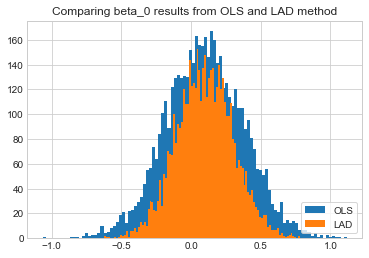

In [60]:
fig1 = plt.figure()
ax = fig1.add_subplot(1,1,1)

ax.hist(beta0_OLS,bins=100,label='OLS')
ax.hist(beta0_LAD,bins=100,label='LAD')

ax.legend(loc='lower right',facecolor='white',frameon=True)
#ax.set_xlabel(' X ')
#ax.set_ylabel(' X')
ax.set_title('Comparing beta_0 results from OLS and LAD method');

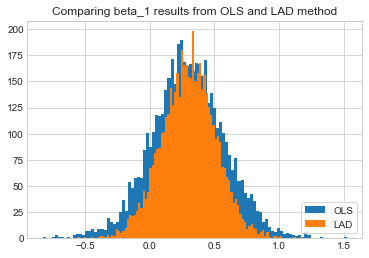

In [61]:
fig2 = plt.figure()
ax = fig2.add_subplot(1,1,1)

ax.hist(beta1_OLS,bins=100,label='OLS')
ax.hist(beta1_LAD,bins=100,label='LAD')

ax.legend(loc='lower right',facecolor='white',frameon=True)
#ax.set_xlabel(' X ')
#ax.set_ylabel(' X')
ax.set_title('Comparing beta_1 results from OLS and LAD method');

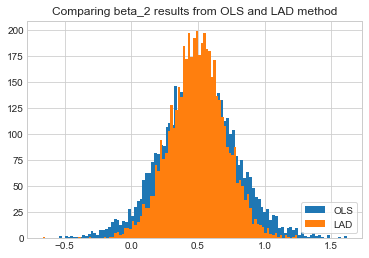

In [62]:
fig3 = plt.figure()
ax = fig3.add_subplot(1,1,1)

ax.hist(beta2_OLS,bins=100,label='OLS')
ax.hist(beta2_LAD,bins=100,label='LAD')

ax.legend(loc='lower right',facecolor='white',frameon=True)
#ax.set_xlabel(' X ')
#ax.set_ylabel(' X')
ax.set_title('Comparing beta_2 results from OLS and LAD method');

# Conclusion